#  EDUNET FOUNDATION -Self Practise Notebook Solutions
# LAB 18- Implementing Logistic Regression 

Problem 1: Implement logistic regression for the given dataset

#  Introduction

**This data set contain some data about 4238 patients this data is** 

• Sex: male or female(Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)**

# Importing Process:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from ydata_profiling import ProfileReport 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score , precision_score, recall_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
sns.set(style="darkgrid")
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'ydata_profiling'

# Assessing and EDA Process:

In [2]:
df = pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
df.shape

(4238, 16)

In [5]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [6]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
cat_columns = ['male','education', 'currentSmoker', 'BPMeds',
               'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']

num_col=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [8]:
for i in cat_columns:
    print(i)
    print("    ")
    print(df[i].value_counts())
    print("    ")

male
    
0    2419
1    1819
Name: male, dtype: int64
    
education
    
1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64
    
currentSmoker
    
0    2144
1    2094
Name: currentSmoker, dtype: int64
    
BPMeds
    
0.0    4061
1.0     124
Name: BPMeds, dtype: int64
    
prevalentStroke
    
0    4213
1      25
Name: prevalentStroke, dtype: int64
    
prevalentHyp
    
0    2922
1    1316
Name: prevalentHyp, dtype: int64
    
diabetes
    
0    4129
1     109
Name: diabetes, dtype: int64
    
TenYearCHD
    
0    3594
1     644
Name: TenYearCHD, dtype: int64
    


In [9]:
df.duplicated().sum()

0

**The first impersonation is that our data :**

**1- contain 16 features and 4238 observations**

**2- have null values in some columns , and haven't dublicate rows**

**3- there is some columns has highly class implance such as prevalentStroke , BPMeds , diabetes , TenYearCHD (The target variable it self)**

In [10]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

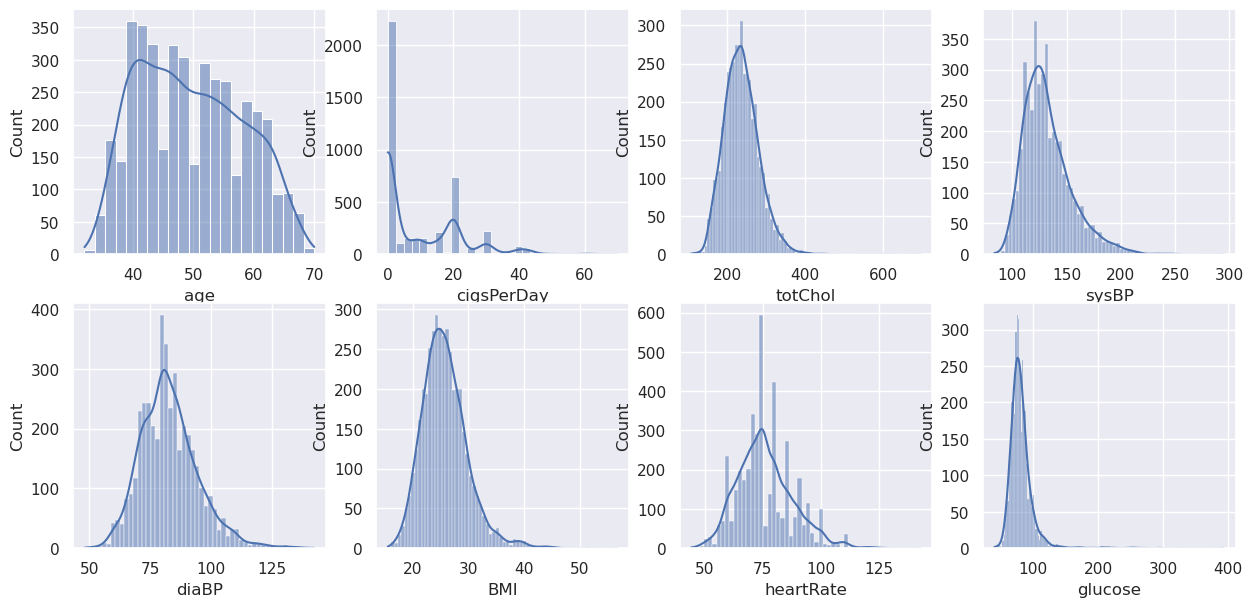

In [11]:
fig, axs = plt.subplots(2, 4 , figsize=(15, 7))
for i in range(2):
    for x in range(4):
        if i == 1:
            sns.histplot(data=df, x=num_col[x+4], kde=True, ax=axs[i, x])
        else:
            sns.histplot(data=df, x=num_col[x], kde=True, ax=axs[i, x])

plt.show()

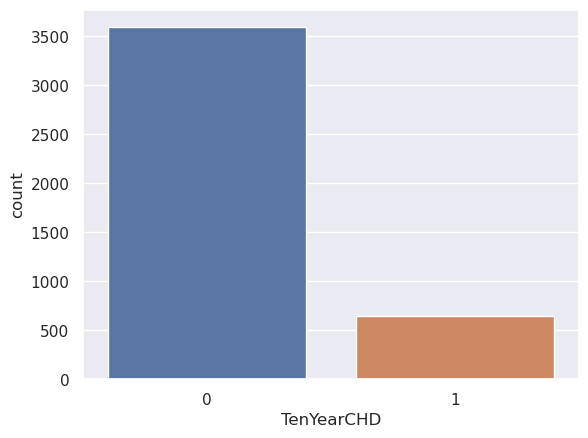

In [12]:
sns.countplot(x=df["TenYearCHD"])
plt.show()

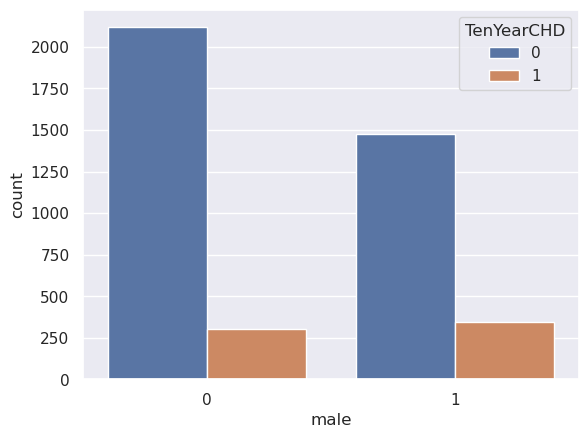

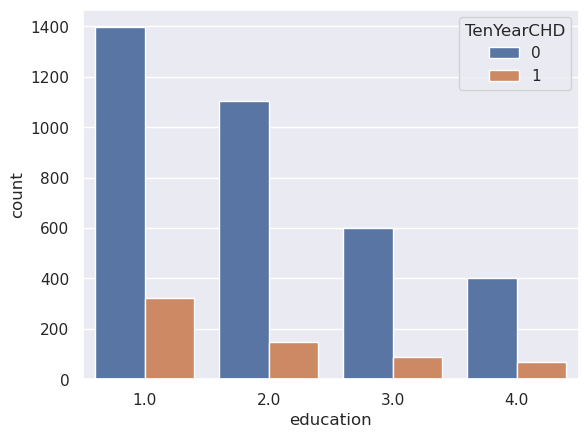

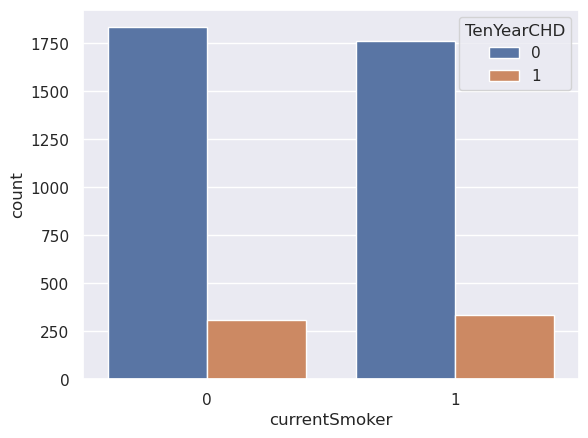

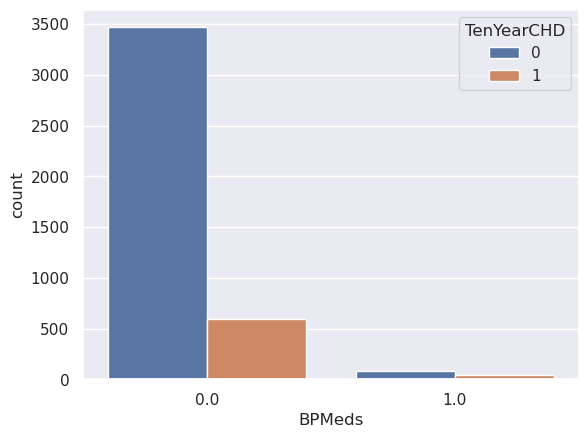

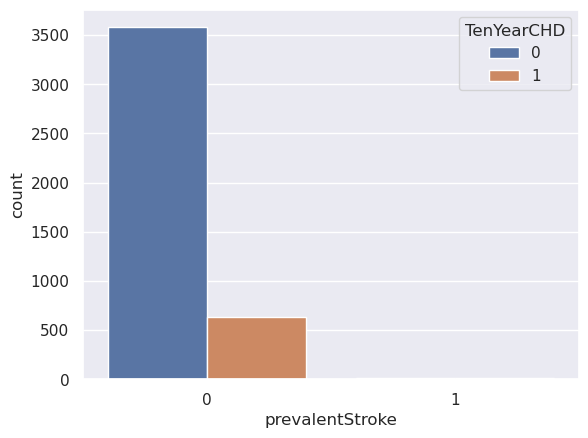

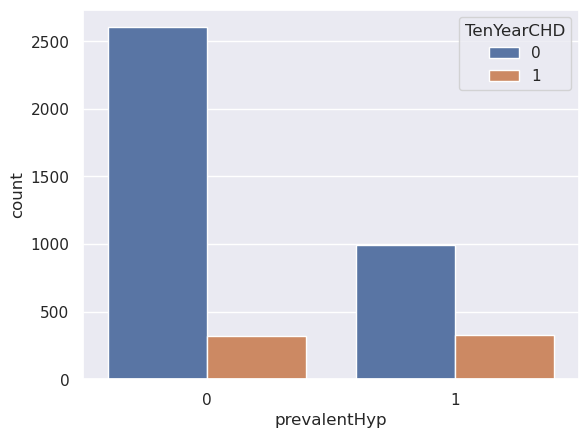

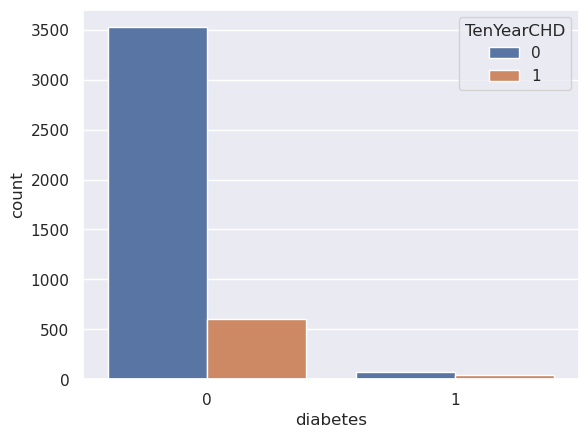

In [13]:
for i in cat_columns:
    if i=="TenYearCHD":
        break
    sns.countplot(x=df[i],hue=df["TenYearCHD"])
    plt.show()

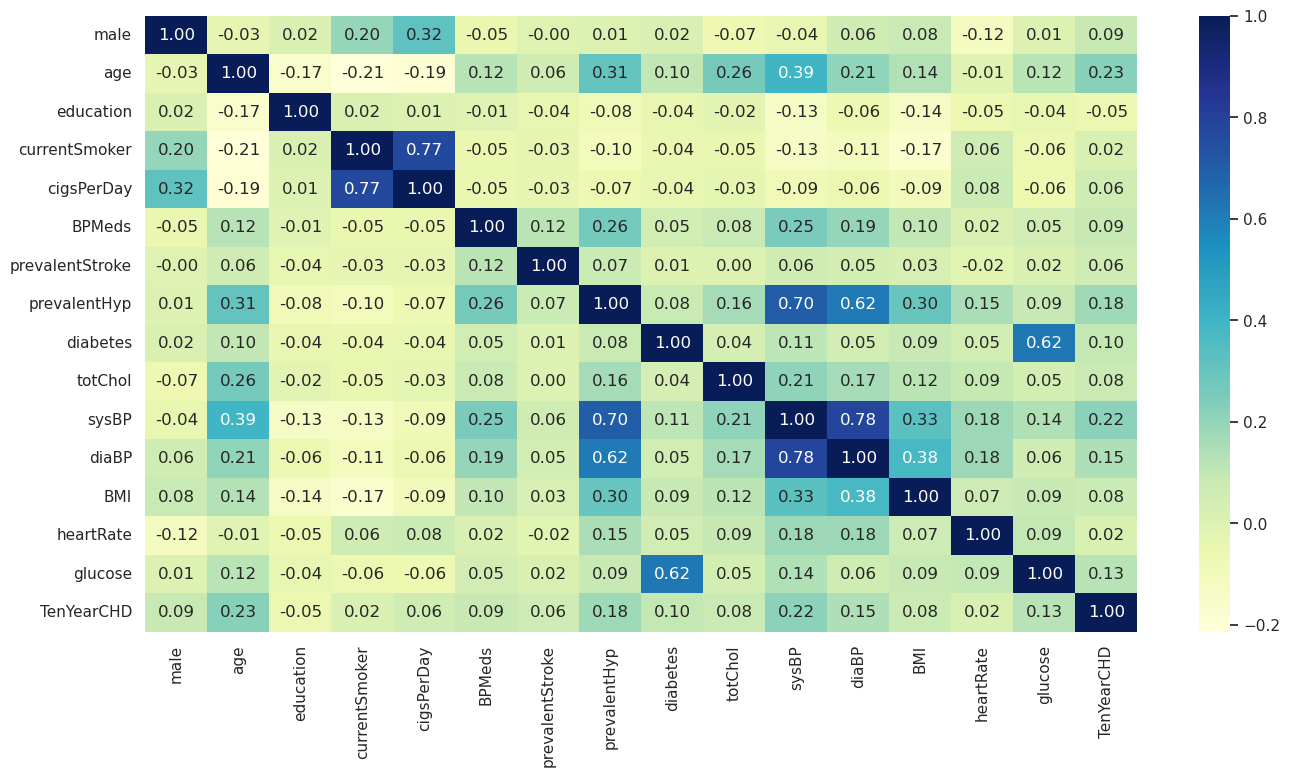

In [14]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

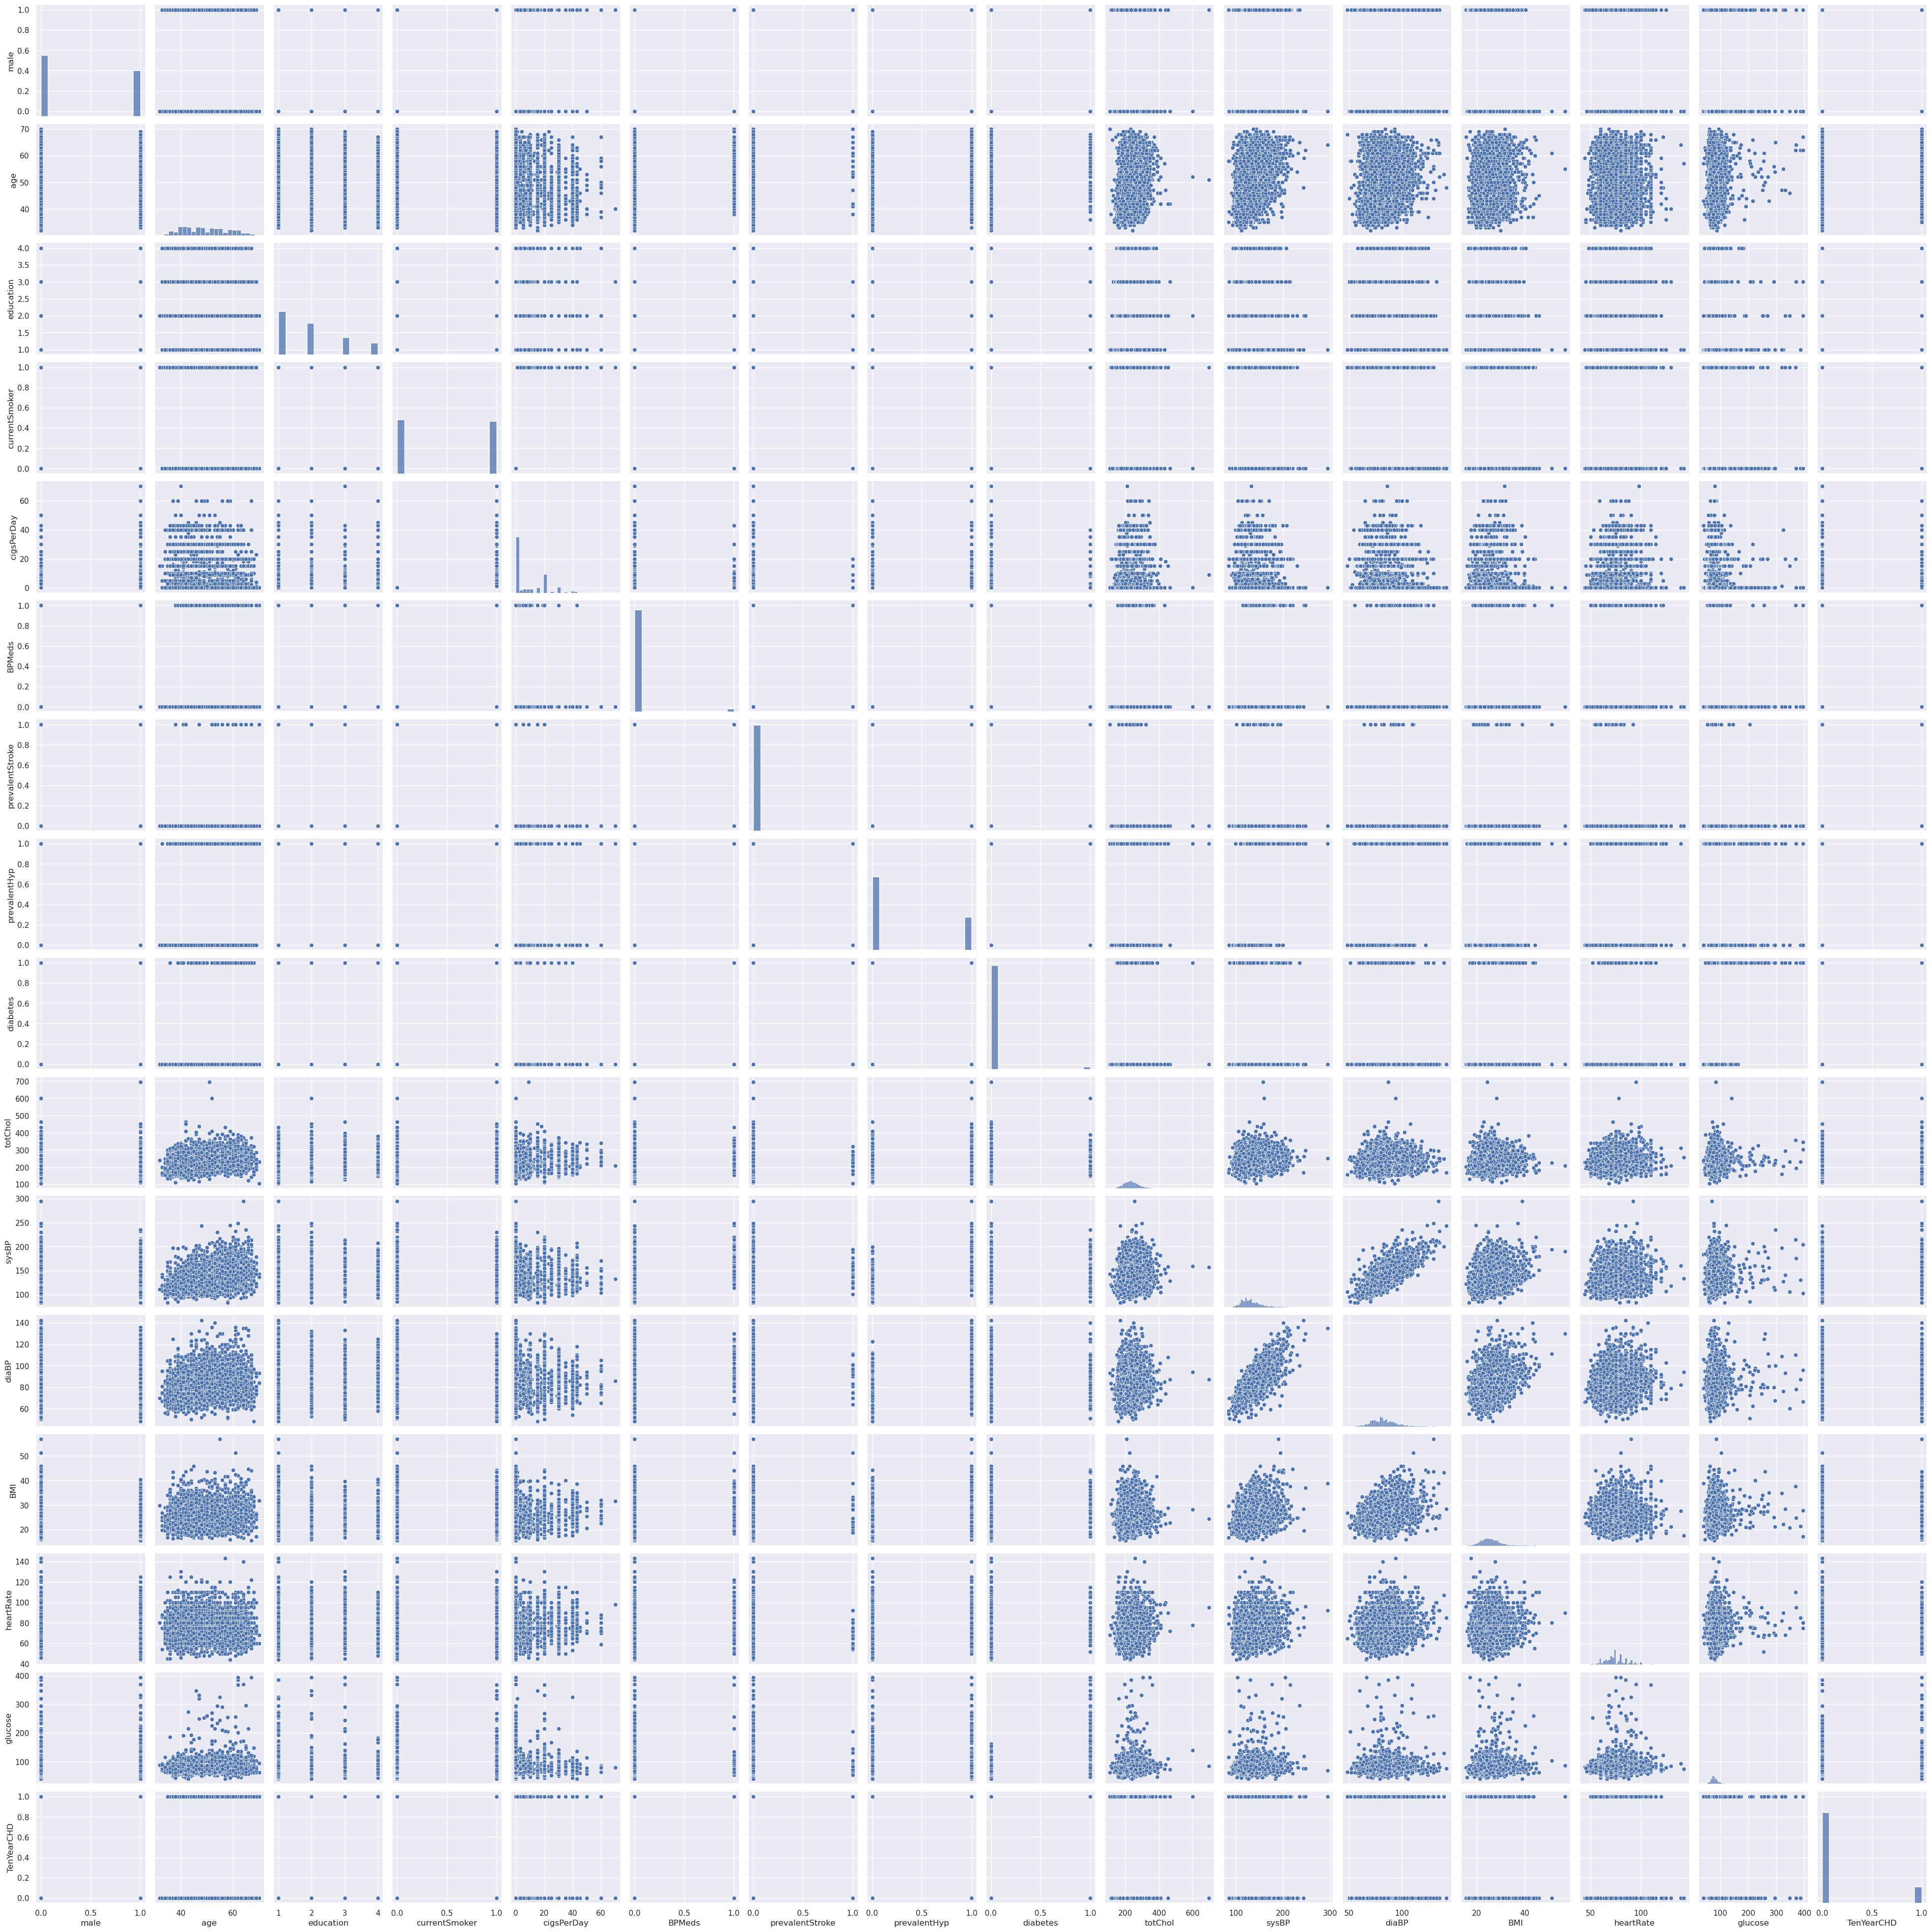

In [15]:
sns.pairplot(df)

In [16]:
report=ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**We can notice here from previous powerful tool (pandas profiling) that there is high correlation between (cigsPerDay,currentSmoker), (diaBP,sysBP) , (sysBP,prevalentHyp) ,(diaBP,prevalentHyp) , (glucose,diabetes)**

**And the missing values in:education - cigsperday - BPMeds - totChol -BMI- heartRate - glucose**

**otherwise there is nothing susbsious from my POV except that we can cheak if there is someone considered to be not smoker and his cigs_per_day higher than zero or vis versa cheak if there is someone cigs_per_day is zero and his status is smoker**

In [17]:
df[((df["currentSmoker"]==0)&(df["cigsPerDay"]>0))|((df["currentSmoker"]==1)&(df["cigsPerDay"]==0))]

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

Great there is consistincy in cigsPerDay and currentSmoker columns

# Wrangling Process:

**We want to handle the missing values**

**Then we want to handle the high correlated varibles and the imbalance features**

We can notice from prevoues pairplot that there is high correlation between diabetes and glucose so we can take advantge of this relationship to get the missing values in glucose 

So we will estimate the mean or the median based on the patiant suffer from diabetes or no 

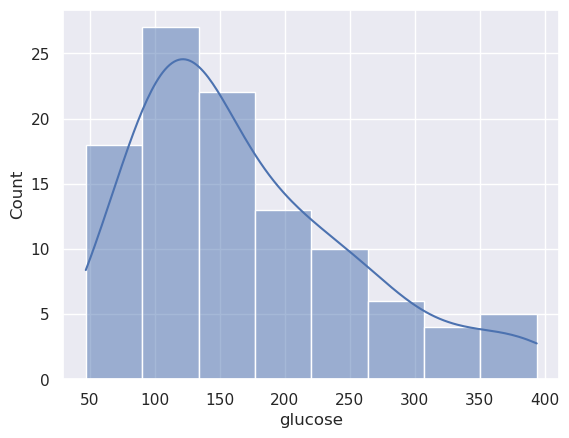

In [18]:
sns.histplot(data=df,x=df[df["diabetes"]==1]["glucose"],kde=True)
plt.show()

as we can see here that the distrbution of the pepole who suffer from diabtes its glucose distrbution is right skweed so its approbite to choose the median to put in null values

In [19]:
med=df[df["diabetes"]==1]["glucose"].median()
med

145.0

In [20]:
index=df[(df["glucose"].isna()) & (df["diabetes"]==1)]["glucose"].index
df.loc[index,"glucose"]=med

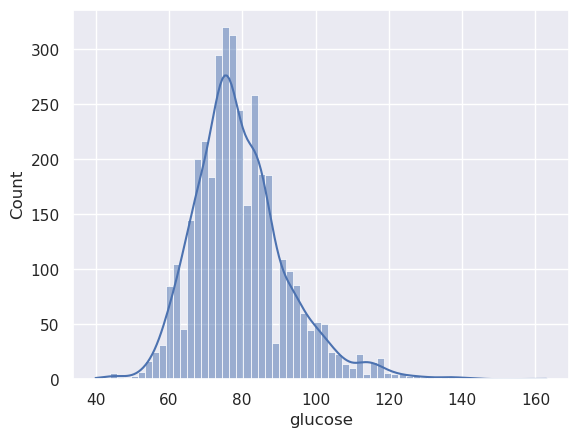

In [21]:
sns.histplot(data=df,x=df[df["diabetes"]==0]["glucose"],kde=True)
plt.show()

as we can see here that the distrbution of the pepole who suffer from diabtes its glucose distrbution is normaly distrbuted so its approbite to choose the mean to put in null values

In [22]:
mean=df[df["diabetes"]==0]["glucose"].mean()
mean

79.48918558077436

In [23]:
index2=df[(df["glucose"].isna()) & (df["diabetes"]==0)]["glucose"].index
df.loc[index2,"glucose"]=mean

In [24]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
TenYearCHD           0
dtype: int64

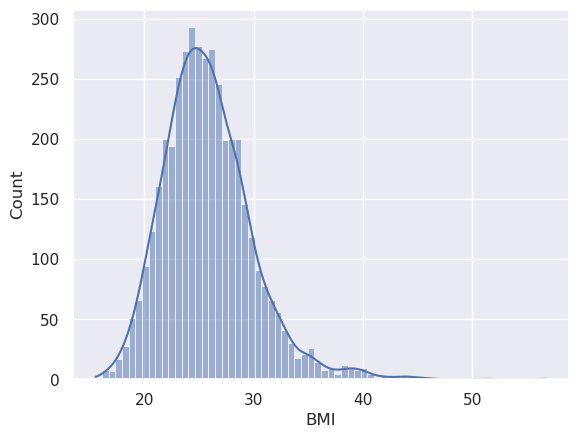

In [25]:
sns.histplot(data=df,x=df["BMI"],kde=True)
plt.show()

Here the BMI distrbution is normal so we will choose the mean to fill the null values

In [26]:
df["BMI"]=df["BMI"].fillna(df["BMI"].mean())

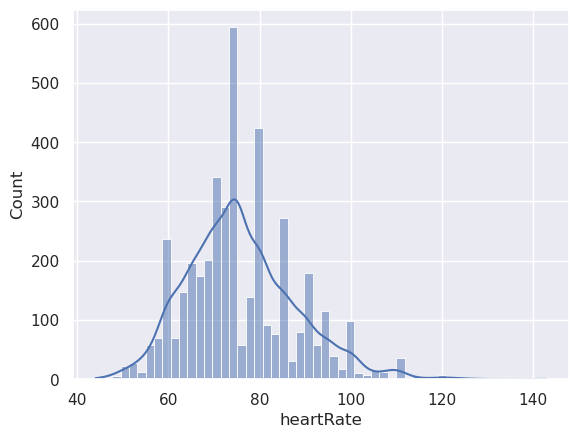

In [27]:
sns.histplot(data=df,x=df["heartRate"],kde=True)
plt.show()

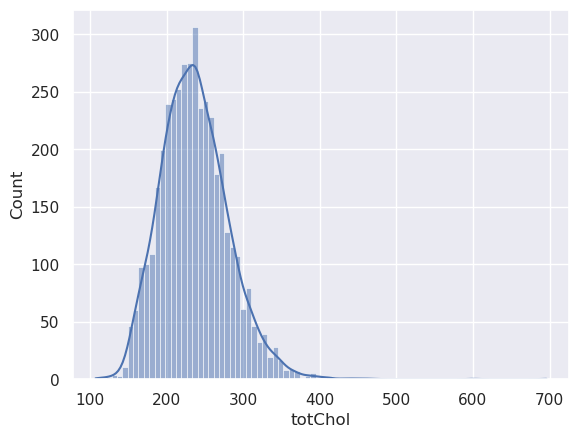

In [28]:
sns.histplot(data=df,x=df["totChol"],kde=True)
plt.show()

The same here for heartRate and totChol

In [29]:
df["heartRate"]=df["heartRate"].fillna(df["heartRate"].mean())

In [30]:
df["totChol"]=df["totChol"].fillna(df["totChol"].mean())

In [31]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

For BPMeds column that represent weather the patiant take blood pressure medcation or not we can know if the patiant take medcation or not from assessing the systol and diastol pressure from my knowladge if the patient take medcation so the systol pressure is more than 120 or diastol more than 80 and we cheak this by scatter plot 

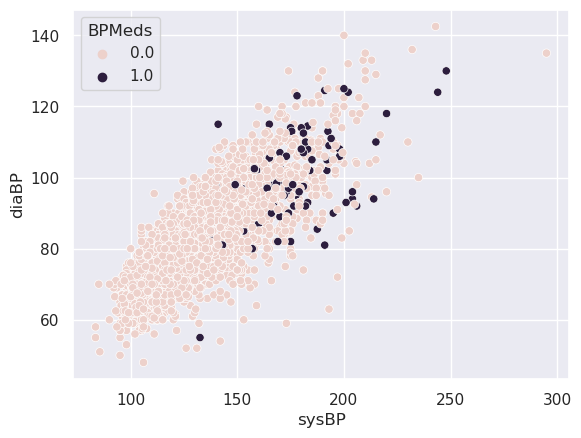

In [32]:
sns.scatterplot(x=df["sysBP"],y=df["diaBP"],hue=df["BPMeds"])
plt.show()

Great this scatter proved what i want to show!!

so any patiant his or her systol pressure more than 120 or diastol more than 80 we will assume that him or her take medcation for blood pressure

In [33]:
index3=df[(df["BPMeds"].isna()) & ((df["sysBP"]<=120) | ((df["diaBP"]<=80)))].index
index4=df[(df["BPMeds"].isna()) & ((df["sysBP"]>120) | ((df["diaBP"]>80)))].index
df.loc[index3,"BPMeds"]=0
df.loc[index4,"BPMeds"]=1

In [34]:
df[(df["BPMeds"].isna())]

Empty DataFrame
Columns: [male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

In [35]:
print(df[(df["cigsPerDay"].isna())].currentSmoker.value_counts())

1    29
Name: currentSmoker, dtype: int64


For cigsPerDay column i didnt found any relationship with anoter variable

and btw the all missing in cigs per day are pepole who smokes

so due to its distrbution in the cell below we will choose the mode to fill the null values which is obviesely 20

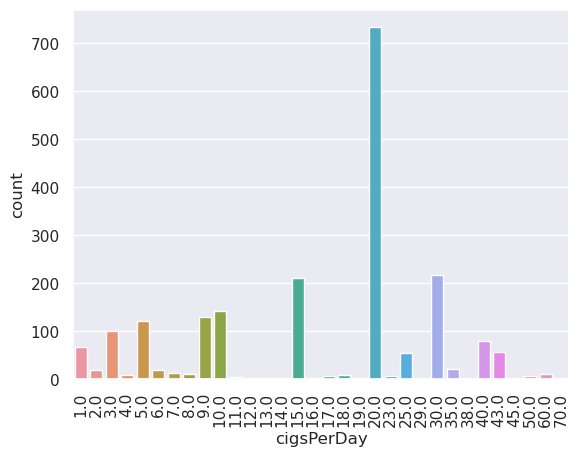

In [36]:
sns.countplot(x=df[(df["currentSmoker"]==1)]["cigsPerDay"])
plt.xticks(rotation=90)
plt.show()

In [37]:
mode=df[(df["currentSmoker"]==1)]["cigsPerDay"].mode()
df["cigsPerDay"]=df["cigsPerDay"].fillna(int(mode))


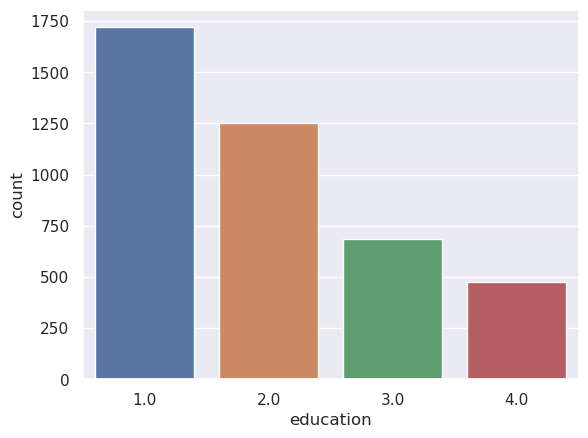

In [38]:
sns.countplot(x=df["education"])
plt.show()

In [39]:
df["education"].value_counts(normalize=True)*100

1.0    41.616259
2.0    30.316961
3.0    16.622308
4.0    11.444471
Name: education, dtype: float64

Here in education column i decsided to fill the null 41 value of it with (1) and 31 value with (2) and 16 value with (3) and 16 value with (4) to keep the balance of the classes 

In [40]:
index5=list(df[(df["education"].isnull())].index)
sample=[42,31,16,16]
for i in range(4):
    x=random.sample(index5,sample[i])
    df.loc[x,"education"]=i+1
    for element in x:
        index5.remove(element)

In [41]:
df.isnull().sum().sum()

0

Now i think we filled the all null values in the data frame

We will try to solve now the mulicollnearty issue the corelated features are (currentSmoker & cigsPerDay), (diaBP & sysBP) , (prevalentHyp & diaBP) , (diabetes & glucose) , (prevalentHyp & sysBP)

to decside which variable to remove we can messure its importance by random forest model and remove the lower important or messure the correlation coeffient with the target variable and remove the one with lower coeff

but for now i will choose the random forest approch 

In [42]:
rf = RandomForestClassifier()
rf.fit( df.iloc[:,:-1], df.iloc[:,-1] )
importance=rf.feature_importances_

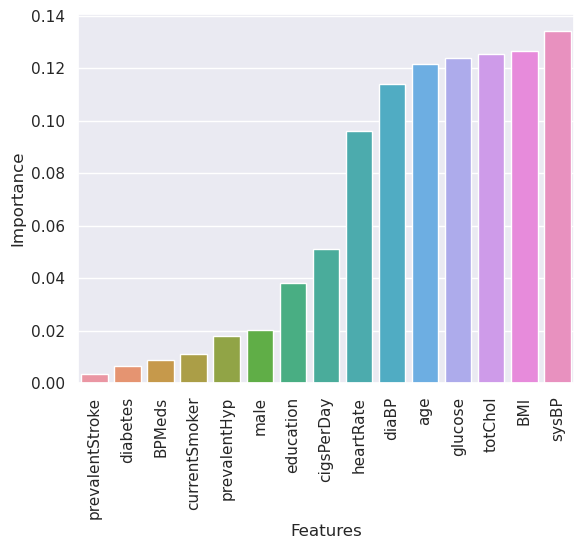

In [43]:
df3=pd.DataFrame({"Features":df.iloc[:,:-1].columns,"Importance":importance})
sns.barplot(x="Features",y="Importance",data=df3,order=df3.sort_values("Importance")['Features'])
plt.xticks(rotation=90)
plt.show()

due to the previous plot we will remove (currentSmoker), (diaBP) , (prevalentHyp) , (diabetes)

In [44]:
df.drop(columns=["diaBP","prevalentHyp","diabetes","currentSmoker"],inplace=True)

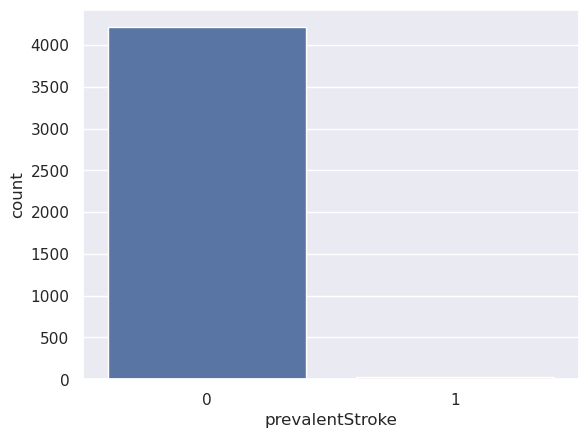

In [45]:
sns.countplot(x=df["prevalentStroke"])
plt.show()

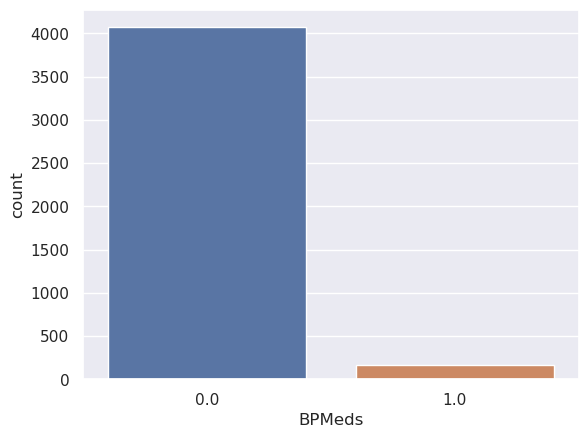

In [46]:
sns.countplot(x=df["BPMeds"])
plt.show()

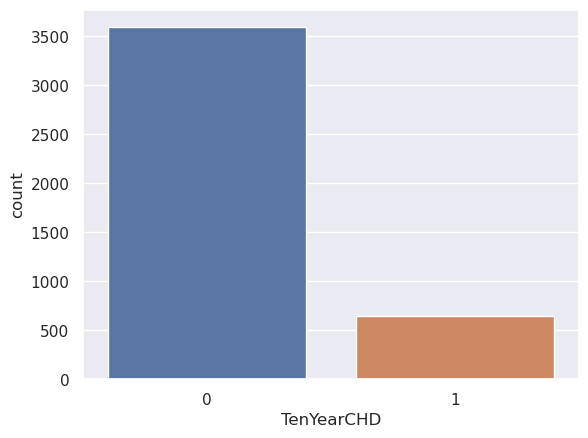

In [47]:
sns.countplot(x=df["TenYearCHD"])
plt.show()

As we can see from the previous three plots that there is high class imbalance 

ignore for now the target varible which we will handle it later so lets focues now with the predectors we will cheak them influnce on the target variable by chi square and cheak the features importance within random forest model

In [48]:
from sklearn.feature_selection import chi2
chi_scores, p_values = chi2(df.iloc[:,[4,5]], df.iloc[:,-1])
p_values

array([2.50707481e-08, 6.02225977e-05])

Soo we will keep them cuz the has p-value less than 0.05

# Modeling

In [49]:
def sensitivity (tp,fn):
    return (tp/(tp+fn))*100
def specificity (tn,fp):
    return (tn/(tn+fp))*100

In [50]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [52]:
ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [53]:
model_1 = LogisticRegression()
model_1.fit(x_train , y_train)

LogisticRegression()

In [54]:
y_predict = model_1.predict(x_test)
accuracy = accuracy_score(y_test , y_predict)
print("The accuracy = ",accuracy,"\n")

cv=cross_val_score(model_1,X,Y,cv=5).mean()
print("The cross validation accuracy = ",cv,"\n")

#predicted = cross_val_predict(model_1, X, Y, cv=10)  
confusion_mat = confusion_matrix(y_test, y_predict)
print(confusion_mat,"\n")
print("precision_score :",precision_score(y_test, y_predict)*100,"\n")
print("recall_score :", recall_score(y_test, y_predict)*100,"\n")
print("sensitivity",sensitivity(17,135),"\n")
print("specificity",specificity(900,8))

The accuracy =  0.8650943396226415 

The cross validation accuracy =  0.8482794435410217 

[[900   8]
 [135  17]] 

precision_score : 68.0 

recall_score : 11.18421052631579 

sensitivity 11.18421052631579 

specificity 99.11894273127754


**Feature Selection (Backward Elimination)**

In [55]:
select=SequentialFeatureSelector(model_1 , k_features = (1,11) , forward = False , floating = False , scoring = "accuracy" , cv = 5 ).fit(x_train,y_train)

In [56]:
selected_features_index = select.k_feature_idx_
selected_features_index

(1, 2, 3, 4, 5, 6, 7, 9, 10)

In [57]:
select.k_feature_names_

('1', '2', '3', '4', '5', '6', '7', '9', '10')

In [58]:
select.k_score_

0.8505368196899916

In [59]:
X.iloc[:,list(selected_features_index)]

age  education  cigsPerDay  BPMeds  prevalentStroke  totChol  sysBP  \
0      39        4.0         0.0     0.0                0    195.0  106.0   
1      46        2.0         0.0     0.0                0    250.0  121.0   
2      48        1.0        20.0     0.0                0    245.0  127.5   
3      61        3.0        30.0     0.0                0    225.0  150.0   
4      46        3.0        23.0     0.0                0    285.0  130.0   
...   ...        ...         ...     ...              ...      ...    ...   
4233   50        1.0         1.0     0.0                0    313.0  179.0   
4234   51        3.0        43.0     0.0                0    207.0  126.5   
4235   48        2.0        20.0     1.0                0    248.0  131.0   
4236   44        1.0        15.0     0.0                0    210.0  126.5   
4237   52        2.0         0.0     0.0                0    269.0  133.5   

      heartRate     glucose  
0          80.0   77.000000  
1          95.0   76.000000  
2          75.0   70.000000  
3          65.0  103.000000  
4          85.0   85.000000  
...         ...         ...  
4233       66.0   86.000000  
4234       65.0   68.000000  
4235       84.0   86.000000  
4236       86.0   79.489186  
4237       80.0  107.000000  

[4238 rows x 9 columns]

In [60]:
X_2 = X.iloc[:,list(selected_features_index)]
Y_2 = df.iloc[:,-1]

x_train,x_test,y_train,y_test=train_test_split(X_2,Y_2,test_size=0.25,random_state=42)

ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

model_2 = LogisticRegression()
model_2.fit(x_train , y_train)

y_predict = model_2.predict(x_test)
accuracy = accuracy_score(y_test , y_predict)
print("Accuracy = ",accuracy,"\n")

cv=cross_val_score(model_2,X_2,Y_2,cv=5).mean()
print("cross validation score = ", cv,"\n")

#predicted = cross_val_predict(model_2, X_2, Y_2, cv=5)  
confusion_mat = confusion_matrix(y_test , y_predict)
print("the confusion matrix is ",confusion_mat,"\n")
print("precision_score :",precision_score(y_test, y_predict)*100,"\n")
print("recall_score :", recall_score(y_test, y_predict)*100,"\n")
print("sensitivity",sensitivity(14,138),"\n")
print("specificity",specificity(901,7))

Accuracy =  0.8641509433962264 

cross validation score =  0.84261600320777 

the confusion matrix is  [[902   6]
 [138  14]] 

precision_score : 70.0 

recall_score : 9.210526315789473 

sensitivity 9.210526315789473 

specificity 99.22907488986785


**Specifiey best hyperparameter using Grid Search**

In [61]:
hyp_param = {
    "penalty": ["l1", "l2"],
    "C": list(range(1, 5)),
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": list(range(100, 600, 100)),
    "class_weight": [{0: 0.15, 1: 0.85}, {0: 0.13, 1: 0.75}, {0: 0.1, 1: 0.95}, {0: 1, 1: 1}]
}


In [62]:
classfier = GridSearchCV(model_2 , hyp_param , cv=5)

In [63]:
classfier.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4],
                         'class_weight': [{0: 0.15, 1: 0.85},
                                          {0: 0.13, 1: 0.75}, {0: 0.1, 1: 0.95},
                                          {0: 1, 1: 1}],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [64]:
result=classfier.cv_results_

In [65]:
classfier.best_params_

{'C': 1,
 'class_weight': {0: 1, 1: 1},
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [66]:
df2=pd.DataFrame(result)
df2.tail()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
795       0.024265      0.000915         0.002251        0.000054       4   
796       0.011628      0.000278         0.002100        0.000043       4   
797       0.011240      0.000626         0.002224        0.000041       4   
798       0.027029      0.010034         0.001267        0.000017       4   
799       0.011744      0.000554         0.001200        0.000021       4   

    param_class_weight param_max_iter param_penalty param_solver  \
795       {0: 1, 1: 1}            500            l2    newton-cg   
796       {0: 1, 1: 1}            500            l2        lbfgs   
797       {0: 1, 1: 1}            500            l2    liblinear   
798       {0: 1, 1: 1}            500            l2          sag   
799       {0: 1, 1: 1}            500            l2         saga   

                                                params  split0_test_score  \
795  {'C': 4, 'class_weight': {0: 1, 1: 1}, 'max_it...           0.850629   
796  {'C': 4, 'class_weight': {0: 1, 1: 1}, 'max_it...           0.850629   
797  {'C': 4, 'class_weight': {0: 1, 1: 1}, 'max_it...           0.850629   
798  {'C': 4, 'class_weight': {0: 1, 1: 1}, 'max_it...           0.850629   
799  {'C': 4, 'class_weight': {0: 1, 1: 1}, 'max_it...           0.850629   

     split1_test_score  split2_test_score  split3_test_score  \
795           0.847484           0.845912           0.851969   
796           0.847484           0.845912           0.851969   
797           0.847484           0.845912           0.851969   
798           0.847484           0.845912           0.851969   
799           0.847484           0.845912           0.851969   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
795           0.855118         0.850222        0.003264               86  
796           0.855118         0.850222        0.003264               86  
797           0.855118         0.850222        0.003264               86  
798           0.855118         0.850222        0.003264               86  
799           0.855118         0.850222        0.003264               86

In [67]:
classfier.best_score_

0.8508512850987966

In [68]:
model_3 = LogisticRegression(C = 1, max_iter = 100, penalty = 'l2', solver = 'newton-cg', class_weight = {0: 1, 1: 1})
model_3.fit(x_train , y_train)

y_predict = model_3.predict(x_test)
accuracy = accuracy_score(y_test , y_predict)
print("Accuracy = ",accuracy)

cv=cross_val_score(model_3,X_2,Y_2,cv=5).mean()
print("cross validation score = ", cv)

#predicted = cross_val_predict(model_3, X_2, Y_2, cv=5)  
confusion_mat = confusion_matrix(y_test , y_predict)
print("the confusion matrix is ",confusion_mat,"\n")
print("precision_score :",precision_score(y_test, y_predict)*100,"\n")
print("recall_score :", recall_score(y_test, y_predict)*100,"\n")
print("sensitivity",sensitivity(14,138),"\n")
print("specificity",specificity(901,7))

Accuracy =  0.8641509433962264
cross validation score =  0.8525266757256466
the confusion matrix is  [[902   6]
 [138  14]] 

precision_score : 70.0 

recall_score : 9.210526315789473 

sensitivity 9.210526315789473 

specificity 99.22907488986785


We can dudce from the previous cells that our model is soo bised to class 0 due to class imbalance even when we tried to set the class weight param and since its a midecal proplem i think we should take care more of pepole who possiply would get heart disease soo we are in front of two approch stuck with what we got or lower our threhold a little bit to increase our true postive alougth our accuracy will deacrease 

I think we should see the distrbution of the predected probability of both classes then decside which threhold we should use to increase our true postive 

In [69]:
class_0_indices = np.where(y_test == 0)[0]
x_test_class_0 = x_test[class_0_indices]
x_test_class_0

array([[ 1.57658171, -0.9482225 , -0.7753345 , ...,  0.70958385,
        -0.33957287,  0.17967478],
       [-0.53438382,  1.02457692, -0.7753345 , ..., -0.33326971,
         0.74940061,  0.04912588],
       [ 0.16927136, -0.9482225 , -0.60736606, ..., -0.24258679,
        -0.0882713 ,  0.61483776],
       ...,
       [-0.53438382,  0.03817721, -0.52338184, ...,  0.05213269,
        -0.9259432 , -0.3860371 ],
       [-1.58986658,  1.02457692, -0.7753345 , ..., -0.80935503,
         0.74940061, -0.10365176],
       [ 0.52109895, -0.9482225 , -0.7753345 , ..., -0.74134284,
        -1.59608073, -0.90823267]])

In [70]:
props_of_class0 = model_2.predict_proba(x_test_class_0)[:,1]

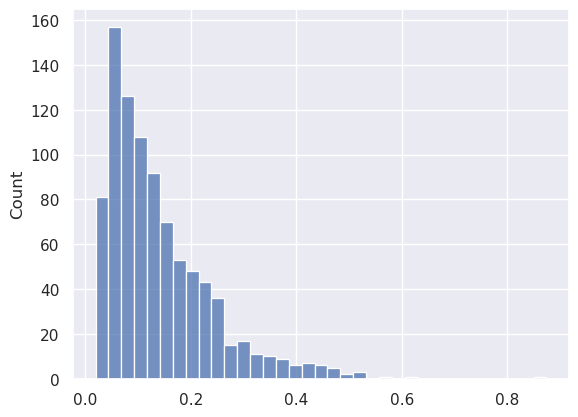

In [71]:
sns.histplot(x= model_2.predict_proba(x_test_class_0)[:,1])   
plt.show()

<Axes: ylabel='Count'>

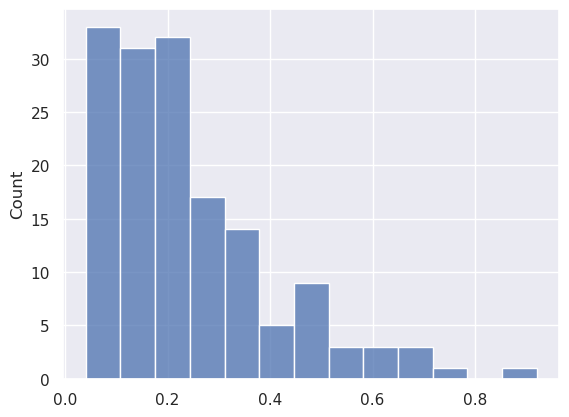

In [72]:
class_1_indices = np.where(y_test == 1)[0]
x_test_class_1 = x_test[class_1_indices]


sns.histplot(x= model_2.predict_proba(x_test_class_1)[:,1])   

due to the shape of the distrbution of the two previous plots i choosed the median of the probabilities of class zero

In [73]:
np.median(model_2.predict_proba(x_test_class_0)[:,1])

0.11311944808077293

In [74]:
xx=model_2.predict_proba(x_test)[:,1]
pred=[]
for i in range (len(xx)):
    if xx[i]<=0.11334226055949978:
        pred.append(0)
    else:
        pred.append(1) 

In [75]:
print(confusion_matrix(y_test,pred),"\n")
print("sensitivity :",sensitivity(114,38),"\n")
print("specificity :",specificity(454,454),"\n")
print("precision_score :",precision_score(y_test,pred)*100,"\n")
print("recall_score :", recall_score(y_test,pred)*100)

[[455 453]
 [ 37 115]] 

sensitivity : 75.0 

specificity : 50.0 

precision_score : 20.246478873239436 

recall_score : 75.6578947368421


In [76]:
accuracy = accuracy_score(y_test , pred)
accuracy

0.5377358490566038

Again its not neccessary what ive done (lowering my threshold) but i just wanted to make sure that the all pepole who are susbected to get heart diseases will will be mostly known , to solve this proplem i think we need more data about the postive class because this situation i think did limit our model and plzzz guys if any one know some solution for this case just through it in the comments i will be really appreciate your help THX ALOT!!!